# Experiment 3: K-Means Clustering after PCA Dimensionality Reduction

## Imports and Configuration

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.models.pca import PCA
from src.models.kmeans import KMeans, KMeansInit
from src.utils.metrics import *
from src.utils.utils import *

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

## Data Loading and Preprocessing

In [5]:
X_scaled, y_true = load_scale_data(data_path='./data/breast_cancer.csv')

print(f"Dataset shape: {X_scaled.shape}")
print(f"Labels shape: {y_true.shape}")

Dataset shape: (569, 30)
Labels shape: (569,)


## Running PCA-KMeans

In [11]:
dims = [2, 5, 10, 15, 20]
exp3_results = []

for d in dims:
    # 1. Dimensionality Reduction
    pca = PCA(n_components=d)
    X_reduced = pca.fit_transform(X_scaled)
    recon_error = pca.reconstruction_error(X_scaled)
    var_ratio = np.sum(pca.explained_variance_ratio_)
    
    # 2. Clustering
    km = KMeans(K=2, init=KMeansInit.KMEANS_PLUS_PLUS, random_state=42)
    km.fit(X_reduced)
    y_pred = km.clusters
    
    # 3. Validation Metrics
    sil = compute_silhouette_score(X_reduced, y_pred)
    db = compute_davies_bouldin(X_reduced, y_pred)
    ari = compute_ari(y_true, y_pred)
    purity = purity_score(y_true, y_pred)
    
    exp3_results.append({
        'Dimensions': d,
        'Reconstruction MSE': recon_error,
        'Explained Var': var_ratio,
        'Silhouette': sil,
        'Davies-Bouldin': db,
        'ARI': ari,
        'Purity': purity
    })

results_df = pd.DataFrame(exp3_results)
results_df

,Dimensions,Reconstruction MSE,Explained Var,Silhouette,Davies-Bouldin,ARI,Purity
0,2,0.367567,0.632432,0.510358,0.846740,0.659231,0.906854
1,5,0.152657,0.847343,0.394124,1.148901,0.653625,0.905097
2,10,0.048431,0.951569,0.358843,1.267900,0.653625,0.905097
3,15,0.013512,0.986488,0.348497,1.306472,0.659427,0.906854
4,20,0.004428,0.995572,0.346259,1.315946,0.659427,0.906854


## Visualization - Reconstruction Error vs. Performance

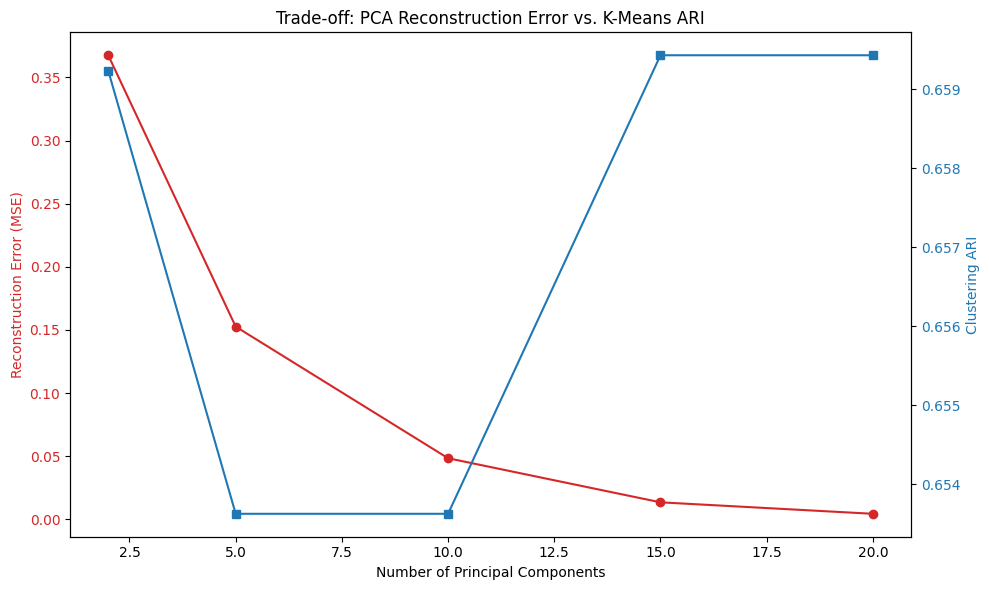

In [12]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Number of Principal Components')
ax1.set_ylabel('Reconstruction Error (MSE)', color='tab:red')
ax1.plot(dims, results_df['Reconstruction MSE'], marker='o', color='tab:red', label='Reconstruction Error')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Clustering ARI', color='tab:blue')
ax2.plot(dims, results_df['ARI'], marker='s', color='tab:blue', label='ARI')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Trade-off: PCA Reconstruction Error vs. K-Means ARI')
fig.tight_layout()
plt.show()

## 2D Projection and Cluster Assignment

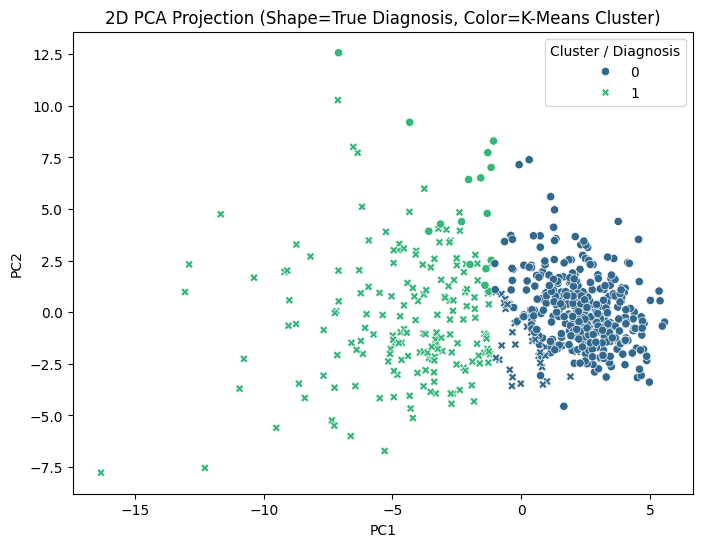

In [13]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)
km_2d = KMeans(K=2, init=KMeansInit.KMEANS_PLUS_PLUS, random_state=42)
km_2d.fit(X_2d)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=km_2d.clusters, palette='viridis', style=y_true)
plt.title("2D PCA Projection (Shape=True Diagnosis, Color=K-Means Cluster)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster / Diagnosis")
plt.show()